In [1]:
import numpy as np
from numpy.matlib import repmat
import matplotlib.pyplot as plt
from load_data import load_skl_data, load_circular_data, load_two_spirals, load_random_classification_dataset

def visclassifier(fun, xTr, yTr, title, w=[], b=0, is_block=False):
    yTr = np.array(yTr).flatten()
    w = np.array(w).flatten()
    marker_symbols = ['o', 'x']
    mycolors = [[0.5, 0.5, 1], [1, 0.5, 0.5]]
    classvals = np.unique(yTr)
    plt.figure()
    res = 300
    xrange = np.linspace(min(xTr[:, 0]), max(xTr[:, 0]), res)
    yrange = np.linspace(min(xTr[:, 1]), max(xTr[:, 1]), res)
    pixelX = repmat(xrange, res, 1)
    pixelY = repmat(yrange, res, 1).T
    xTe = np.array([pixelX.flatten(), pixelY.flatten()]).T
    testpreds = fun(xTe)
    Z = testpreds.reshape(res, res)
    plt.contourf(pixelX, pixelY, np.sign(Z), colors=mycolors)
    for idx, c in enumerate(classvals):
        plt.scatter(xTr[yTr == c, 0], xTr[yTr == c, 1], marker=marker_symbols[idx], color='k')
    if w != []:
        alpha = -1 * b / (w ** 2).sum()
        plt.quiver(w[0] * alpha, w[1] * alpha, w[0], w[1], linewidth=2, color=[0, 1, 0])
    plt.axis('tight')
    plt.title(title)
    plt.show(block=is_block)

In [2]:
train_data, train_labels, val_data, val_labels, test_data, test_labels = load_two_spirals(120)

In [3]:
from sklearn.neural_network import MLPClassifier

In [4]:
nn = MLPClassifier(hidden_layer_sizes=(1000, 100), max_iter=1000, alpha=0.)
nn.fit(train_data, train_labels)
print(np.mean(nn.predict(train_data) == train_labels), np.mean(nn.predict(val_data) == val_labels), np.mean(nn.predict(test_data) == test_labels))

1.0 0.5833333333333334 0.8333333333333334


<ipython-input-1-791ad0c052f1>:24: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if w != []:


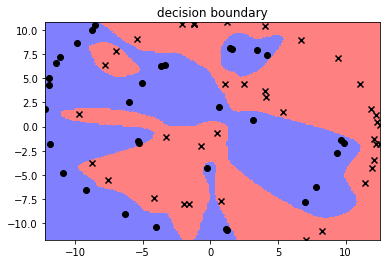

In [5]:
visclassifier(nn.predict, train_data, train_labels, 'decision boundary')